# STEP 1: IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# STEP 2: LOAD DATASET

In [ ]:
df = pd.read_csv("Boston_housing.csv")

# STEP 3: BASIC EDA

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
print(f"Shape: {df.shape} (Rows: {df.shape[0]}, Columns: {df.shape[1]})")

Shape: (506, 14) (Rows: 506, Columns: 14)


In [ ]:
# Check Missing Values

missing_value = df.isnull().sum()
missing_percentage = (missing_value / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing_value,
    "Percentage": missing_percentage
})

print(missing_df)

         Missing Count  Percentage
CRIM                20    3.952569
ZN                  20    3.952569
INDUS               20    3.952569
CHAS                20    3.952569
NOX                  0    0.000000
RM                   0    0.000000
AGE                 20    3.952569
DIS                  0    0.000000
RAD                  0    0.000000
TAX                  0    0.000000
PTRATIO              0    0.000000
B                    0    0.000000
LSTAT               20    3.952569
MEDV                 0    0.000000


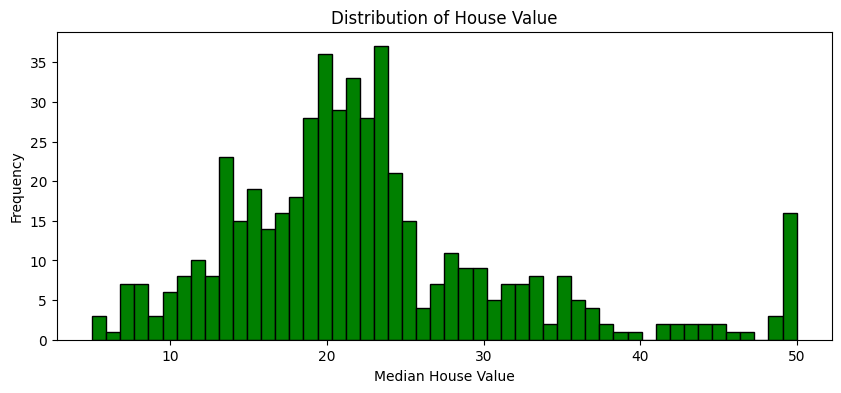

In [ ]:
# Visualize target variable
plt.figure(figsize=(10,4))
plt.hist(df['MEDV'], bins=50, color='green', edgecolor='black')
plt.title("Distribution of House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
# select numerical columns

numerical_columns = df.select_dtypes(include=('int64', 'float64'))
numerical_columns.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
# Correlation analysis for numeric features

corr = df.corr()['MEDV'].sort_values(ascending=False)
print(corr)

MEDV       1.000000
RM         0.695360
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
RAD       -0.381626
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64


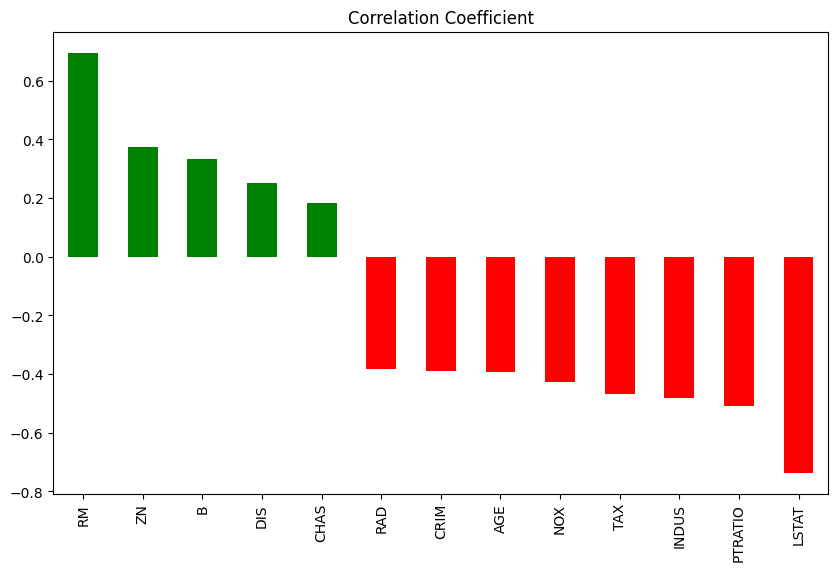

In [ ]:
plt.figure(figsize=(10,6))
corr.drop('MEDV').plot(kind='bar', color=['green' if x > 0 else 'red' for x in corr.drop('MEDV')])
plt.title("Correlation with MEDV")
plt.title('Correlation Coefficient')
plt.show()

# STEP 4: Handle Missing Values

In [ ]:
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

missing_df = pd.DataFrame({
  "Missing Count": missing,
  "Missing Percentage": missing_percentage
})

print(missing_df[missing_df["Missing Count"] > 0])

       Missing Count  Missing Percentage
CRIM              20            3.952569
ZN                20            3.952569
INDUS             20            3.952569
CHAS              20            3.952569
AGE               20            3.952569
LSTAT             20            3.952569


In [ ]:
# fill the the missing value with median
df.fillna(df.median(numeric_only=True), inplace=True)

In [ ]:
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing,
    "Missing Percentage": missing_percentage
})

print(missing_df[missing_df["Missing Count"] > 0])

Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


# STEP 5: Feature Selection/Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
X = df.drop(['MEDV'], axis=1, errors='ignore')
y = df['MEDV']

In [ ]:
X.shape

(506, 13)

In [ ]:
y.shape

(506,)

# STEP 6: Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
X_train.shape

(404, 13)

In [ ]:
y_train.shape

(404,)

In [ ]:
X_test.shape

(102, 13)

In [ ]:
y_test.shape

(102,)

# STEP 7: Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# STEP 8: SVR WITH LINEAR KERNEL

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='linear', C = 100)
model.fit(X_train_scaler, y_train)

SVR(C=100, kernel='linear')

In [ ]:
model.score(X_test_scaler, y_test)

0.6018732651452359

In [ ]:
y_pred = model.predict(X_test_scaler)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
linear_mse = mean_squared_error(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)
linear_r2  = r2_score(y_test, y_pred)
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("SVM (Kernal='liner', C = 100)")
print(f"Mean Squared Error: {linear_mse}")
print(f"Mean Absolute Error: {linear_mae}")
print(f"R2 Score: {linear_r2}")
print(f"RMSE: {linear_rmse}")

SVM (Kernal='liner', C = 100)
Mean Squared Error: 29.19613964416666
Mean Absolute Error: 3.097843398449443
R2 Score: 0.6018732651452359
RMSE: 5.403345227187197


# STEP 9: SVR WITH RBF KERNEL

In [ ]:
model_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model_rbf.fit(X_train_scaler, y_train)

SVR(C=100, gamma=0.1)

In [ ]:
y_pred_rbf = model_rbf.predict(X_test_scaler)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
rbf_mse = mean_squared_error(y_test, y_pred_rbf)
rbf_mae = mean_absolute_error(y_test, y_pred_rbf)
rbf_r2 = r2_score(y_test, y_pred_rbf)
rbf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rbf))

print("SVR WITH RBF KERNEL")
print(f"Mean Squared Error: {rbf_mse}")
print(f"Mean Absolute Error: {rbf_mae}")
print(f"R2 Score: {rbf_r2}")
print(f"RMSE: {rbf_rmse}")

SVR WITH RBF KERNEL
Mean Squared Error: 15.62289961974582
Mean Absolute Error: 2.2501756634826378
R2 Score: 0.7869617665082013
RMSE: 3.952581386859203


# STEP 10: SVR WITH POLYNOMIAL KERNEL

In [ ]:
model_poly = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
model_poly.fit(X_train_scaler, y_train)

SVR(C=100, degree=2, kernel='poly')

In [ ]:
y_pred_poly = model_poly.predict(X_test_scaler)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_mae = mean_absolute_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)
poly_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("SVR WITH POLYNOMIAL KERNEL")
print(f"Mean Squared Error: {poly_mse}")
print(f"Mean Absolute Error: {poly_mae}")
print(f"R2 Score: {poly_r2}")
print(f"RMSE: {poly_rmse}")

SVR WITH POLYNOMIAL KERNEL
Mean Squared Error: 27.59212072985847
Mean Absolute Error: 3.581467274218094
R2 Score: 0.6237461161721831
RMSE: 5.403345227187197


# STEP 11: MODEL COMPARISON

In [ ]:
results = pd.DataFrame({
    'Kernel': ['Linear', 'RBF', 'Polynomial'],
    'R² Score': [linear_r2, rbf_r2, poly_r2],
    'MAE ($k)': [linear_mae, rbf_mae, poly_mae],
    'RMSE ($k)': [linear_rmse, rbf_rmse, poly_rmse]
})

print(results)

       Kernel  R² Score  MAE ($k)  RMSE ($k)
0      Linear  0.601873  3.097843   5.403345
1         RBF  0.786962  2.250176   3.952581
2  Polynomial  0.623746  3.581467   1.760069


# STEP 12: HYPERPARAMETER TUNING WITH GRIDSEARCHCV

In [ ]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],           # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1, 'scale'], # Kernel coefficient
    'epsilon': [0.01, 0.1, 0.2, 0.5]        # Margin tolerance
}

In [ ]:
print(f"\nTesting {len(param_grid['C']) * len(param_grid['gamma']) * len(param_grid['epsilon'])} combinations...")



Testing 100 combinations...


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=SVR(kernel='rbf'),
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='r2',
    verbose=1,
    n_jobs=-1                # Use all CPU cores
)

In [ ]:
# Fit GridSearchCV
grid_search.fit(X_train_scaler, y_train)

# Best parameters
print("\n--- Best Hyperparameters Found ---")
print(f"✓ Best C: {grid_search.best_params_['C']}")
print(f"✓ Best Gamma: {grid_search.best_params_['gamma']}")
print(f"✓ Best Epsilon: {grid_search.best_params_['epsilon']}")
print(f"✓ Best CV R² Score: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits

--- Best Hyperparameters Found ---
✓ Best C: 100
✓ Best Gamma: scale
✓ Best Epsilon: 0.01
✓ Best CV R² Score: 0.8652


In [ ]:
# Predict with best model
y_pred_tuned = grid_search.best_estimator_.predict(X_test_scaler)

tuned_r2 = r2_score(y_test, y_pred_tuned)
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print("\n--- Tuned Model Performance (Test Set) ---")
print(f"R² Score: {tuned_r2:.4f}")
print(f"MAE: ${tuned_mae:.4f}k")
print(f"RMSE: ${tuned_rmse:.4f}k")


--- Tuned Model Performance (Test Set) ---
R² Score: 0.8008
MAE: $2.1976k
RMSE: $3.8223k


# STEP 13: CROSS-VALIDATION ON BEST MODEL

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
print("\n[STEP 6] Cross-Validation (5-Fold)...")
cv_scores = cross_val_score(
    grid_search.best_estimator_,
    X_train_scaler,
    y_train,
    cv=5,
    scoring='r2'
)
print(f"CV R² Scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


[STEP 6] Cross-Validation (5-Fold)...
CV R² Scores: [0.83422495 0.82038899 0.90348169 0.88651405 0.8811967 ]
Mean CV R²: 0.8652 (+/- 0.0321)


# STEP 14: BEFORE vs AFTER TUNING COMPARISON

In [ ]:
comparison = pd.DataFrame({
    'Model': ['SVR-RBF (Default)', 'SVR-RBF (Tuned)'],
    'R² Score': [rbf_r2, tuned_r2],
    'MAE ($k)': [rbf_mae, tuned_mae],
    'RMSE ($k)': [rbf_rmse, tuned_rmse]
})

print("\n")
print(comparison.to_string(index=False))



            Model  R² Score  MAE ($k)  RMSE ($k)
SVR-RBF (Default)  0.786962  2.250176   3.952581
  SVR-RBF (Tuned)  0.800775  2.197622   3.822296


In [ ]:
improvement = ((tuned_r2 - rbf_r2) / rbf_r2) * 100
print(f"\n✓ Improvement in R²: {improvement:.2f}%")


✓ Improvement in R²: 1.76%


# STEP 15: VISUALIZATIONS

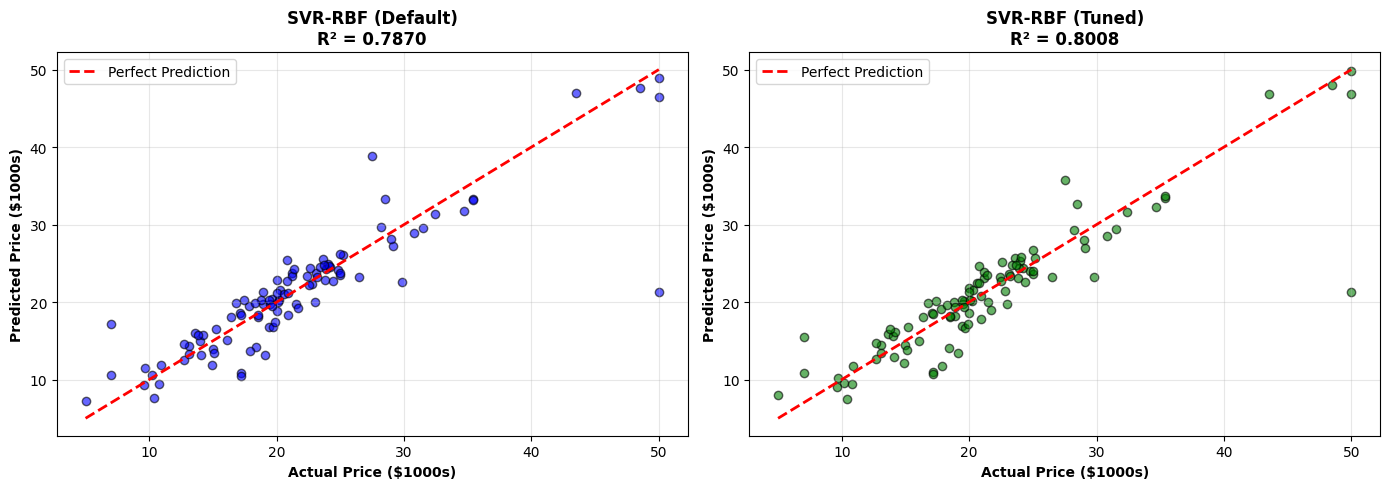

In [ ]:
# 14.1: Actual vs Predicted
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before tuning
axes[0].scatter(y_test, y_pred_rbf, alpha=0.6, color='blue', edgecolor='black')
axes[0].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price ($1000s)', fontweight='bold')
axes[0].set_ylabel('Predicted Price ($1000s)', fontweight='bold')
axes[0].set_title(f'SVR-RBF (Default)\nR² = {rbf_r2:.4f}', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# After tuning
axes[1].scatter(y_test, y_pred_tuned, alpha=0.6, color='green', edgecolor='black')
axes[1].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Price ($1000s)', fontweight='bold')
axes[1].set_ylabel('Predicted Price ($1000s)', fontweight='bold')
axes[1].set_title(f'SVR-RBF (Tuned)\nR² = {tuned_r2:.4f}', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

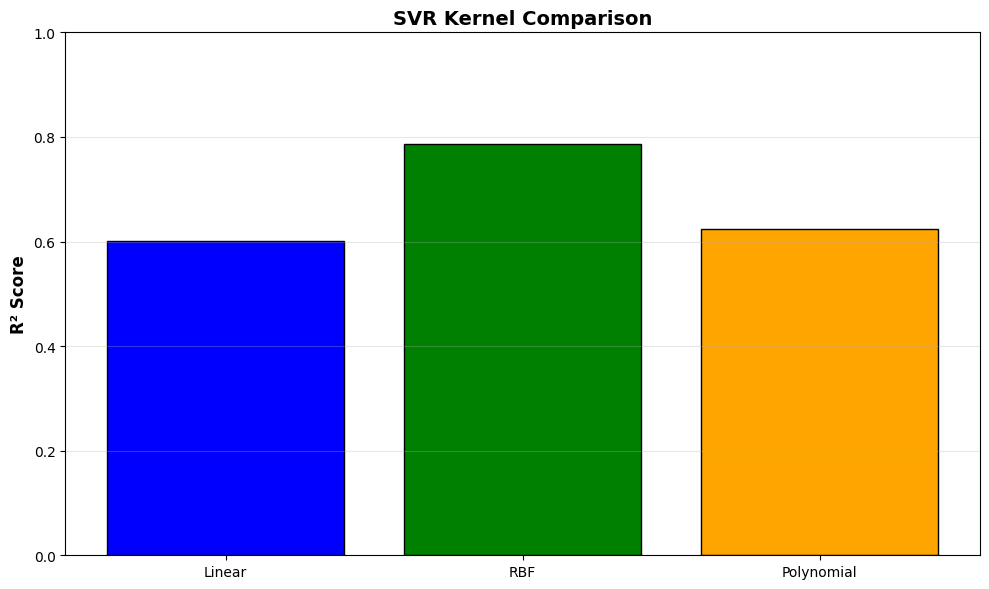

In [ ]:
# 14.2: Kernel Comparison
plt.figure(figsize=(10, 6))
kernels = results['Kernel']
r2_scores = results['R² Score']

plt.bar(kernels, r2_scores, color=['blue', 'green', 'orange'], edgecolor='black')
plt.ylabel('R² Score', fontweight='bold', fontsize=12)
plt.title('SVR Kernel Comparison', fontweight='bold', fontsize=14)
plt.ylim([0, 1])
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

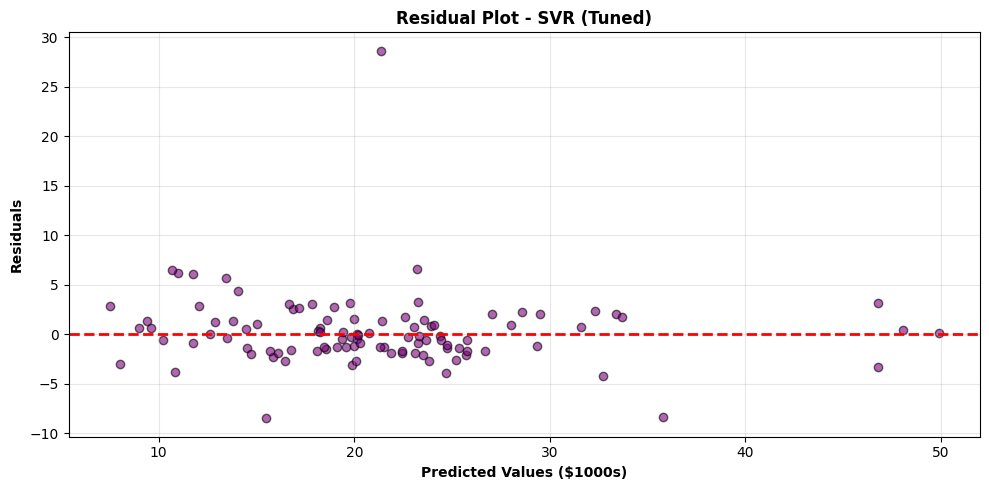

In [ ]:
# 14.3: Residual Plot
residuals = y_test - y_pred_tuned

plt.figure(figsize=(10, 5))
plt.scatter(y_pred_tuned, residuals, alpha=0.6, color='purple', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values ($1000s)', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.title('Residual Plot - SVR (Tuned)', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()